# Phù hợp mẫu - Template Matching

## Mục tiêu
Trong hướng dẫn này, bạn sẽ học cách:

- Sử dụng hàm OpenCV `matchTemplate()` để tìm kiếm các kết quả khớp giữa một bản vá hình ảnh và một hình ảnh đầu vào
- Sử dụng hàm OpenCV `minMaxLoc()` để tìm các giá trị lớn nhất và nhỏ nhất (cũng như vị trí của chúng) trong một mảng nhất định.

### Ghép mẫu là gì?
Ghép mẫu là một kỹ thuật để tìm các vùng của hình ảnh khớp (tương tự) với hình ảnh mẫu (miếng vá).

Mặc dù miếng vá phải là hình chữ nhật nhưng có thể không phải toàn bộ hình chữ nhật đều có liên quan. Trong trường hợp như vậy, có thể sử dụng mặt nạ để cô lập phần miếng vá cần sử dụng để tìm phần khớp.

### Nó hoạt động như thế nào?
Chúng ta cần hai thành phần chính:

1. Ảnh nguồn (I): Ảnh mà chúng ta mong đợi tìm thấy sự trùng khớp với ảnh mẫu
2. Ảnh mẫu (T): Ảnh vá sẽ được so sánh với ảnh nguồn mục tiêu của chúng ta là phát hiện vùng trùng khớp cao nhất:

![image](https://docs.opencv.org/4.x/Template_Matching_Template_Theory_Summary.jpg)

Để xác định vùng phù hợp, chúng ta phải so sánh hình ảnh mẫu với hình ảnh nguồn bằng cách trượt nó:

![image](https://docs.opencv.org/4.x/Template_Matching_Template_Theory_Sliding.jpg)

- Bằng cách trượt, chúng tôi muốn nói đến việc di chuyển miếng vá từng pixel một (từ trái sang phải, từ trên xuống dưới). Tại mỗi vị trí, một số liệu được tính toán để biểu thị mức độ "tốt" hay "xấu" của sự khớp tại vị trí đó (hoặc mức độ giống nhau của miếng vá với khu vực cụ thể đó của hình ảnh nguồn).
- Đối với mỗi vị trí của T trên I, bạn lưu trữ số liệu trong ma trận kết quả R. Mỗi vị trí $(x,y)$ trong R chứa số liệu khớp:

![image](https://docs.opencv.org/4.x/Template_Matching_Template_Theory_Result.jpg)

hình ảnh trên là kết quả R của việc trượt miếng vá với số liệu `TM_CCORR_NORMED`. Các vị trí sáng nhất biểu thị các kết quả khớp cao nhất. Như bạn có thể thấy, vị trí được đánh dấu bằng vòng tròn màu đỏ có thể là vị trí có giá trị cao nhất, do đó vị trí đó (hình chữ nhật được tạo thành bởi điểm đó như một góc và chiều rộng và chiều cao bằng với hình ảnh miếng vá) được coi là kết quả khớp.

- Trong thực tế, chúng tôi xác định giá trị cao nhất (hoặc thấp hơn, tùy thuộc vào loại phương pháp khớp) trong ma trận R, bằng cách sử dụng hàm `minMaxLoc()`

### Mặt nạ hoạt động như thế nào?

- Nếu cần che dấu để khớp, cần có ba thành phần:
1. Ảnh nguồn (I): Ảnh mà chúng ta mong đợi tìm thấy sự khớp với ảnh mẫu
2. Ảnh mẫu (T): Ảnh vá sẽ được so sánh với ảnh nguồn
3. Ảnh mặt nạ (M): Mặt nạ, ảnh thang độ xám che dấu mẫu

- Hiện tại chỉ có hai phương pháp khớp chấp nhận mặt nạ: TM_SQDIFF và TM_CCORR_NORMED (xem bên dưới để biết giải thích về tất cả các phương pháp khớp có trong opencv).

- Mặt nạ phải có cùng kích thước với mẫu

- Mặt nạ phải có độ sâu CV_8U hoặc CV_32F và cùng số kênh với ảnh mẫu. Trong trường hợp CV_8U, các giá trị mặt nạ được coi là nhị phân, tức là bằng không và khác không. Trong trường hợp CV_32F, các giá trị phải nằm trong phạm vi [0..1] và các pixel mẫu sẽ được nhân với các giá trị pixel mặt nạ tương ứng. Vì các ảnh đầu vào trong mẫu có kiểu CV_8UC3 nên mặt nạ cũng được đọc là ảnh màu.

![image](https://docs.opencv.org/4.x/Template_Matching_Mask_Example.jpg)


### Những phương pháp khớp lệnh nào có sẵn trong OpenCV?

OpenCV triển khai chức năng so khớp mẫu trong hàm `matchTemplate()`. Các phương thức khả dụng là 6:
1. `TM_SQDIFF`: Sai số bình phương
2. `TM_SQDIFF_NORMED`: Chuẩn hóa sai số bình phương
3. `TM_CCORR`: So sánh trực tiếp
4. `TM_CCORR_NORMED`: So sánh trực tiếp chuẩn hóa
5. `TM_CCOEFF`: Tương quan chéo
6. `TM_CCOEFF_NORMED`: Tương quan chuẩn hóa

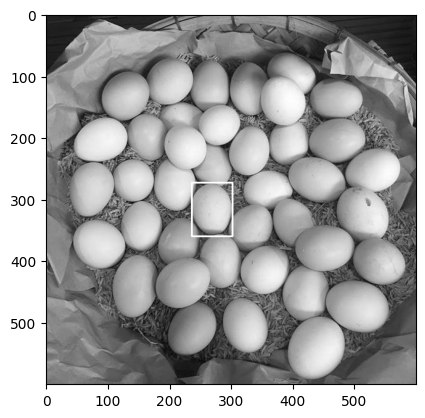

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/eggs.jpg', 0)         # ảnh lớn
template = cv2.imread('images/egg.png', 0) # ảnh mẫu nhỏ
w, h = template.shape[::-1]

# So sánh
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)

# Tìm vị trí giống nhất
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Vẽ khung kết quả
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, 255, 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))